<a href="https://colab.research.google.com/github/jjgl0540-hub/Leeds_Energy_Project_GEOG5415M/blob/main/GEOG5415M_Final_Project_202018307_01_data_processing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# GEOG5415M Final Assignment (Template)

Student ID number:202018307

In [ ]:
# read in required packages

# import all packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import geopandas as gpd

In [ ]:
# configure plotting settings
%matplotlib inline
sns.set_theme(style="whitegrid")

In [ ]:
# mount google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


This is an example block of mardown text I want to reference <a href="#ref1">[1]</a>. I might need to add some more citations <a href="#ref2">[2]</a><a href="#ref2">[3]</a>



**1.Introduction & Data Sources**

This project develops a spatial data analysis workflow to identify variations in energy vulnerability across Leeds. While national energy support policies in the UK are often income-based, they may overlook households that face high energy costs due to poor building efficiency rather than low income alone.

To address this, the project integrates Energy Performance Certificate (EPC) data with selected sociodemographic indicators from the 2021 UK Census. This combination helps identify areas where housing structure conditions exacerbate energy-related risks for specific populations.

Leeds was selected as the case study because of its diverse housing stock (large-scale Victorian terraced houses) and the presence of distinct student-dominated communities where average income levels may mask underlying energy vulnerabilities. Local policymakers and energy planners are the target audience for this analysis, as they can leverage this type of spatial evidence to develop more targeted and context-sensitive energy support programs.




**Data Sources:**







*   EPC Data: Sourced from DLUHC (Domestic Energy Performance Certificates), aggregated to LSOA level to represent average housing efficiency.
*   Census 2021: Sourced from NOMIS, providing student population,central heating fuel types and tenure status per LSOA.


*   LSOA Boundaries: Sourced from ONS Geoportal for spatial mapping.





In [ ]:
# load the data
epc=pd.read_csv('/content/drive/MyDrive/Leeds_Energy_Project_GEOG5415M/data/raw/epc_leeds_2025.csv')
imd=pd.read_csv('/content/drive/MyDrive/Leeds_Energy_Project_GEOG5415M/data/raw/imd_2019.csv')
lsoa=gpd.read_file('/content/drive/MyDrive/Leeds_Energy_Project_GEOG5415M/data/raw/LSOA/LSOA_2021_EW_BGC_V5.shp')


/tmp/ipython-input-2001626475.py:2: DtypeWarning: Columns (15,37,39,40,83) have mixed types. Specify dtype option on import or set low_memory=False.
  epc=pd.read_csv('/content/drive/MyDrive/Leeds_Energy_Project_GEOG5415M/data/raw/epc_leeds_2025.csv')


In [ ]:
# load remaining data
# define a helper function to read the NOMIS census CSV file.
# the top of the NOMIS file contains several lines of metadata,
# therefore, the first 7 lines are skipped to read the header correctly.
def read_nomis_csv(path, skiprows=7):
    return pd.read_csv(path, skiprows=skiprows)

heating=read_nomis_csv('/content/drive/MyDrive/Leeds_Energy_Project_GEOG5415M/data/raw/census_heating_2021.csv')
students=read_nomis_csv('/content/drive/MyDrive/Leeds_Energy_Project_GEOG5415M/data/raw/census_students_2021.csv')
tenure=read_nomis_csv('/content/drive/MyDrive/Leeds_Energy_Project_GEOG5415M/data/raw/census_tenure_2021.csv')

In [ ]:
# after loading each dataset, basic data integrity checks (such as structure and completeness) were performed.
# this demonstration shows the checks performed on the EPC dataset.

epc.head()

,LMK_KEY,ADDRESS1,ADDRESS2,ADDRESS3,POSTCODE,BUILDING_REFERENCE_NUMBER,CURRENT_ENERGY_RATING,POTENTIAL_ENERGY_RATING,CURRENT_ENERGY_EFFICIENCY,POTENTIAL_ENERGY_EFFICIENCY,...,CONSTITUENCY_LABEL,POSTTOWN,CONSTRUCTION_AGE_BAND,LODGEMENT_DATETIME,TENURE,FIXED_LIGHTING_OUTLETS_COUNT,LOW_ENERGY_FIXED_LIGHT_COUNT,UPRN,UPRN_SOURCE,REPORT_TYPE
0,001dca82162cbdf798f746f53027c0cc82afda971d5e84...,Flat 2,35a Town Street,Farsley,LS28 5HX,10003805692,E,C,42,70,...,Pudsey,PUDSEY,England and Wales: before 1900,2022-12-06 16:54:30,Rented (private),9.0,NaN,72736113.0,Energy Assessor,100
1,18a413eb393a87aaccdcbbc35d75c519a13bf9713e5d8d...,8 Sackville Street,NaN,NaN,LS7 2AS,10003489215,D,B,61,82,...,Leeds North East,LEEDS,England and Wales: 1900-1929,2022-10-03 15:40:47,Rented (private),12.0,NaN,72658276.0,Energy Assessor,100
2,18ad988b1d1a739e5adfd04531c27c63e7ea810f40c31d...,20 Highfield Gardens,NaN,NaN,LS12 4DU,10003423919,C,B,72,86,...,Leeds West,LEEDS,England and Wales: 2007-2011,2022-10-25 07:49:22,Rented (social),6.0,NaN,72683080.0,Energy Assessor,100
3,18bd4432597b334e2d8031b1ded0e4d713f2133e939b89...,17 Chestnut Gardens,NaN,NaN,LS12 4LP,10002989904,B,A,88,92,...,Leeds West,Leeds,England and Wales: 1983-1990,2022-10-06 16:09:42,Owner-occupied,7.0,NaN,72266470.0,Address Matched,100
4,275687798052018050310193492080467,"9, Foxwood Farm Way",NaN,NaN,LS8 3EE,4759821668,D,B,58,87,...,Leeds East,LEEDS,England and Wales: 1983-1990,2018-05-03 10:19:34,owner-occupied,NaN,NaN,72269527.0,Address Matched,100


**Programming Workflow & Data preparation**

In [ ]:
# 1.Data cleaning
# 1.1 uniform key column naming
heating=heating.rename(columns={"mnemonic": "lsoa_code"})
students=students.rename(columns={"mnemonic": "lsoa_code"})
tenure=tenure.rename(columns={"mnemonic": "lsoa_code"})

In [ ]:
# 1.2 combine a census table
lsoa_census = (heating.merge(students, on="lsoa_code", how="left").merge(tenure, on="lsoa_code", how="left"))

In [ ]:
# 1.3 process LSOA datasets

# uniform key column naming and screen out Leeds' LSOA
lsoa=lsoa.rename(columns={"LSOA21CD": "lsoa_code"})
lsoa_leeds=lsoa[lsoa['lsoa_code'].isin(lsoa_census["lsoa_code"])].copy()

# paste the census attributes.
lsoa_geo=lsoa_leeds.merge(lsoa_census, on="lsoa_code", how="left")

In [ ]:
# 1.4 process epc dataset

# since epc dataset does not have an encoding like lsoa_code
# it needs to be converted first
# load the file that converts postcode
lookup=pd.read_csv("/content/drive/MyDrive/Leeds_Energy_Project_GEOG5415M/data/raw/PCD_OA21_LSOA21.csv")

# keep only the necessary fields and use consistent column names.
lookup=lookup[["pcds", "lsoa21cd"]].rename(columns={"pcds": "postcode","lsoa21cd": "lsoa_code"})

# clean the postcode (to be consistent with EPC).
lookup["postcode_clean"]=(lookup["postcode"].astype(str).str.upper().str.replace(" ", "", regex=False))

# keep only the two columns needed for the join
lookup=lookup[["postcode_clean", "lsoa_code"]]


/tmp/ipython-input-3332639867.py:6: DtypeWarning: Columns (13) have mixed types. Specify dtype option on import or set low_memory=False.
  lookup=pd.read_csv("/content/drive/MyDrive/Leeds_Energy_Project_GEOG5415M/data/raw/PCD_OA21_LSOA21.csv")


In [ ]:
# clean epc postcodes for reliable matching (uppercase + remove spaces)
epc["postcode_clean"]=(epc["POSTCODE"].astype(str).str.upper().str.replace(" ", "", regex=False))

# Add lsoa_code to epc dataset
epc=epc.merge(lookup,on="postcode_clean",how="left")

# check the match rate
print(epc['lsoa_code'].notna().mean())

# randomly select several samples
epc[['POSTCODE', 'postcode_clean', 'lsoa_code']].sample(10, random_state=42)

0.9988389184944723


,POSTCODE,postcode_clean,lsoa_code
12561,LS7 2QE,LS72QE,E01011450
26108,LS7 3ER,LS73ER,E01011360
281043,LS28 5LW,LS285LW,E01011593
317456,LS18 4DH,LS184DH,E01011465
4183,LS4 2NG,LS42NG,E01011479
181626,LS12 1DH,LS121DH,E01033015
111460,LS16 7AT,LS167AT,E01011384
396899,LS20 9EY,LS209EY,E01011279
22246,LS10 3SQ,LS103SQ,E01032498
205074,LS3 1BX,LS31BX,E01035045


In [ ]:
# check the match rate
print(epc["lsoa_code"].notna().mean())

# randomly select several samples
epc["POSTCODE", "postcode_clean", "lsoa_code"]].sample(10, random_state=42)

0.9988389184944723


,POSTCODE,postcode_clean,lsoa_code
12561,LS7 2QE,LS72QE,E01011450
26108,LS7 3ER,LS73ER,E01011360
281043,LS28 5LW,LS285LW,E01011593
317456,LS18 4DH,LS184DH,E01011465
4183,LS4 2NG,LS42NG,E01011479
181626,LS12 1DH,LS121DH,E01033015
111460,LS16 7AT,LS167AT,E01011384
396899,LS20 9EY,LS209EY,E01011279
22246,LS10 3SQ,LS103SQ,E01032498
205074,LS3 1BX,LS31BX,E01035045


In [ ]:
# convert the EPC energy efficiency column to numerical values ​​(for calculating the average)
for c in ["CURRENT_ENERGY_EFFICIENCY", "POTENTIAL_ENERGY_EFFICIENCY"]:
    if c in epc.columns:
        epc[c]=pd.to_numeric(epc[c], errors="coerce")

In [ ]:
# re-aggregate and analyze the scores of individual buildings according to LSOA partitions

# aggregate EPC records by LSOA
# remove EPC records without LSOA code
epc_clean=epc.dropna(subset=["lsoa_code"])

# group EPC records by LSOA
epc_grouped=epc_clean.groupby("lsoa_code")

# aggregate EPC data to LSOA level
epc_lsoa=epc_grouped.agg(mean_current_eff=("CURRENT_ENERGY_EFFICIENCY", "mean"),mean_potential_eff=("POTENTIAL_ENERGY_EFFICIENCY", "mean"),
    n_properties=("LMK_KEY", "count")).reset_index()

In [ ]:
# merge epc_lsoa and lsoa_geo
final_geo=lsoa_geo.merge(epc_lsoa, on="lsoa_code", how="left")

Number of LSOAs with EPC data: 511
Total number of Leeds LSOAs (geometry): 488


<Axes: >

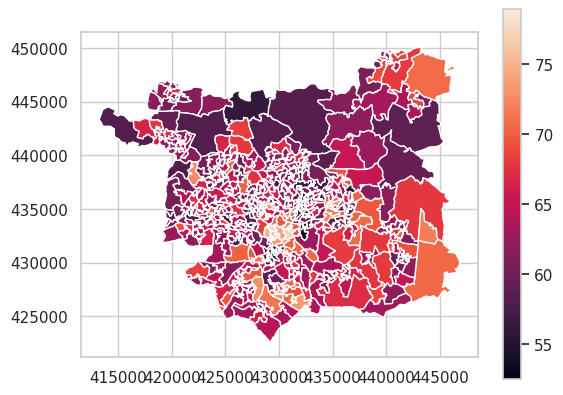

In [ ]:
# Spatial sanity checks
# coverage check: number of LSOAs represented in each dataset
x_epc_lsoa=epc_lsoa["lsoa_code"].nunique()
x_lsoa_geo=lsoa_geo["lsoa_code"].nunique()

print(f"Number of LSOAs with EPC data: {x_epc_lsoa}")
print(f"Total number of Leeds LSOAs (geometry): {x_lsoa_geo}")

# visual sanity check (should only show Leeds area)
final_geo.plot(column="mean_current_eff", legend=True)

In [ ]:
# check missing EPC values after spatial merge
final_geo[["mean_current_eff", "mean_potential_eff", "n_properties"]].isna().sum()


,0
mean_current_eff,0
mean_potential_eff,0
n_properties,0


In [ ]:
# proportion of LSOAs with EPC data
final_geo['mean_current_eff'].notna().mean()

np.float64(1.0)

In [ ]:
# check space merging status
final_geo.geometry.is_valid.all()

np.True_

**Visualisation & Interpretation**

**Limitations & Ethical Considerations**

**Conclusion**

Data Visualisation
- Don't forget to present your final two data visualisation (one spatial and one non-spatial) and the justifications about the decisions you made whilst preparing and visualising the data.

## References
<p><a href="add_url_here">[1]</a>Footnote citation goes here</p>
<p><a href="https://github.com/FrancescaPontin/GEOG5415M-Programming-for-Spatial-Data-Science">[2]</a>GEOG5415M course materials</p>
<p><a href="add_url_here">[3]</a>Citation 3</p>